# Folium 모듈로 시각화한 국내 코로나 확진자 현황  
---  

### 개요  
- 지역별 코로나 누적 확진자를 파악하기 위해 Folium 모듈로 그린 시각화 지도  

### 목차  
1. 데이터 로드
2. 데이터 가공
3. 시각화 

### 결과

- Folium 모듈로 이동 경로를 표시할 수 있는 옵션을 공부하면 좋을것 같다. 

---
## 1. 데이터 로드

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pprint import pprint as pp

import folium 
from folium import plugins
from folium.plugins import HeatMap

In [7]:
df_PatientInfo = pd.read_csv('/home/seong/workspace/covid/Data/PatientInfo.csv')
df_region = pd.read_csv('/home/seong/workspace/covid/Data/Region.csv')
#df_PatientInfo.head()

---
## 2. 데이터 가공

In [8]:
index_null= df_PatientInfo.contact_number[df_PatientInfo.contact_number == "-"].index
df_patient_nn= df_PatientInfo.drop(index_null)
# df_patient_nn

df_patient_nn["contact_number"]= pd.to_numeric(df_patient_nn.contact_number)
del df_patient_nn["contact_number"]
# df_patient_nn.info()

df_marge= pd.merge(df_patient_nn, df_region, on= "city")
# pp(type(df_marge))
# df_marge

df_group= df_marge.groupby("city").count()
# pp(type(df_group))
df_group= {"patient_id": df_group.patient_id}
df_group= pd.DataFrame(df_group)

# df_group

df_city= df_marge
df_city= {"city": df_city.city, "latitude": df_city.latitude, "longitude": df_city.longitude}
df_city= pd.DataFrame(df_city)
df_city_nn= df_city.drop_duplicates("city")

# df_city_nn

df_city_nn= pd.merge(df_city_nn, df_group, on= "city")
# df_city_nn

df_city_nn= df_city_nn.reset_index().sort_values("city")
# df_city_nn

df_city_xy= {"latitude": list(df_city_nn.latitude), "longitude": list(df_city_nn.longitude), "patient_id": list(df_city_nn.patient_id)}
df_city_xy= pd.DataFrame(df_city_xy)
df_city_xy

df_patient = pd.merge(df_PatientInfo[['patient_id','province','city']],
                     df_region[['province','city','latitude','longitude']], 
                     how = 'left', 
                     on = ['province','city'])
regional_count = df_patient[['latitude','longitude']].dropna()

#regional_count

---
## 3. 시각화

In [9]:
count_map= folium.Map(location= [36, 128], zoom_start= 7, tiles='stamenToner')

folium.plugins.HeatMap(df_city_xy, radius= 30).add_to(count_map)



folium.plugins.Fullscreen(position='topright').add_to(count_map)

minimap = folium.plugins.MiniMap(toggle_display=True)
count_map.add_child(minimap)

folium.plugins.MarkerCluster(regional_count).add_to(count_map)

count_map

---
## Github에서 folium의 시각화 결과를 확인할 수 없어 이미지를 로드 했습니다.

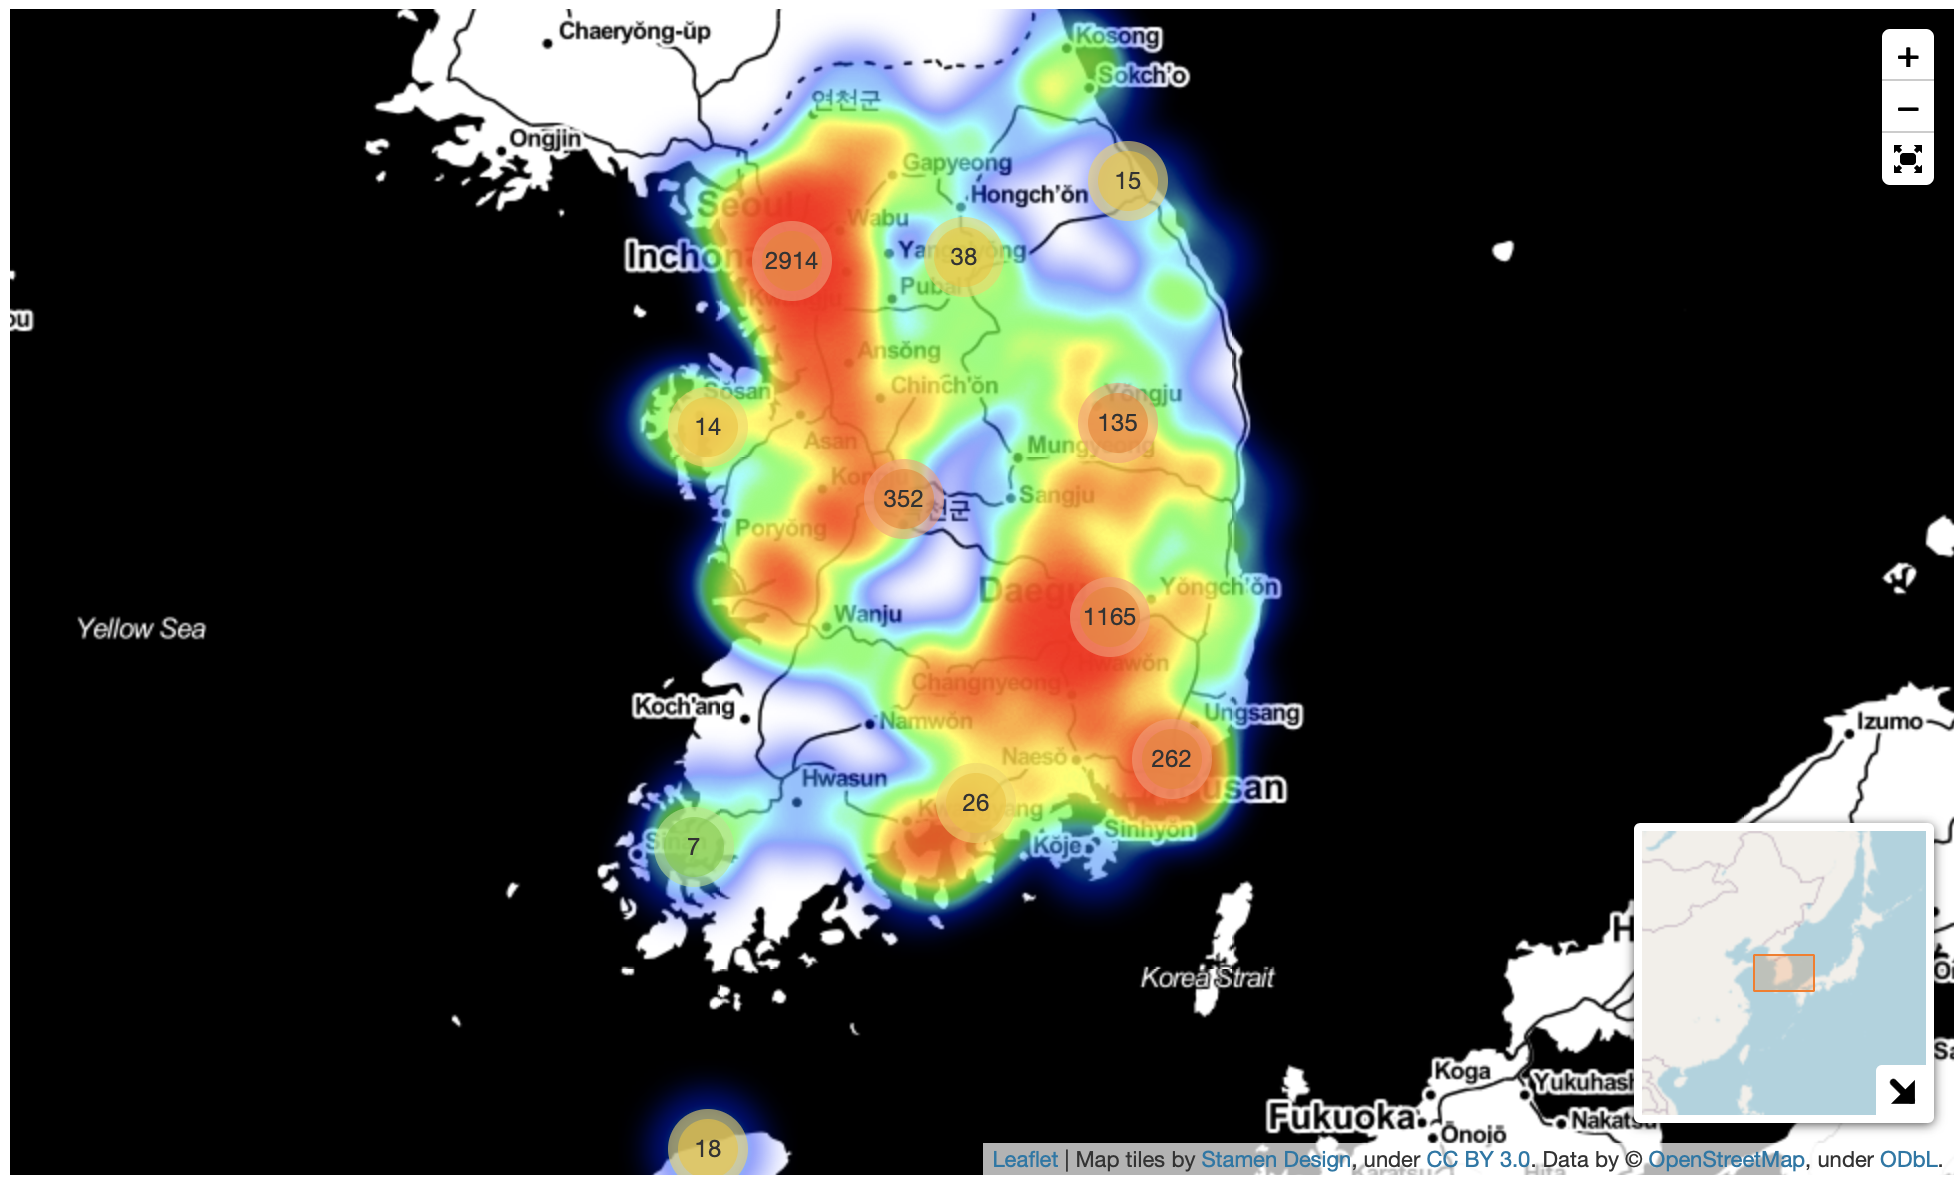